(2062, 64, 64)
(2062, 10)


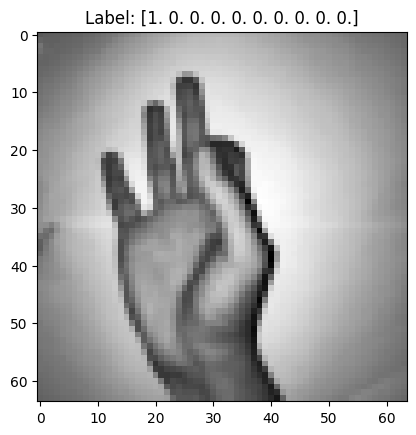

In [6]:
"""
@Author: blankxiao
@file: show_data.ipynb
@Created: 2024-11-22 22:26
@Desc: 数据查看可视化
"""

import numpy as np
import matplotlib.pyplot as plt

X=np.load('../dataset/sign-language-digits-dataset/X.npy')
y=np.load('../dataset/sign-language-digits-dataset/Y.npy')

print(X.shape)
print(y.shape)

# 打印一个图片 并打印其标签
plt.imshow(X[0], cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()



### 图片和标签对应有误，需要重新映射

In [7]:
y = np.argmax(y, axis=1)
# 对应标签
label_map = {0: 9, 1: 0, 2: 7, 3: 6, 4: 1, 5: 8, 6: 4, 7: 3, 8: 2, 9: 5}

y = np.vectorize(label_map.get)(y)

X_normal=X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [8]:
def show_image_classes(images, labels, label_map, n=5):
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)
    
    rows, cols = num_classes, n
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    plt_id = 0
    for label in unique_labels:
        label_indexes = np.where(labels == label)[0]
        sample_indexes = label_indexes[:n]
        
        for idx in sample_indexes:
            axes[plt_id].imshow(images[idx], cmap='gray')
            axes[plt_id].set_xticks([])
            axes[plt_id].set_yticks([])
            original_label = [k for k, v in label_map.items() if v == label][0]
            axes[plt_id].set_title(f"Sign Language Digit: {label}")
            plt_id += 1
    
    for ax in axes[plt_id:]:
        ax.axis('off')
    
    plt.suptitle("Sign Language Digits Dataset", fontsize=16, y=1)
    plt.tight_layout()
    plt.show()

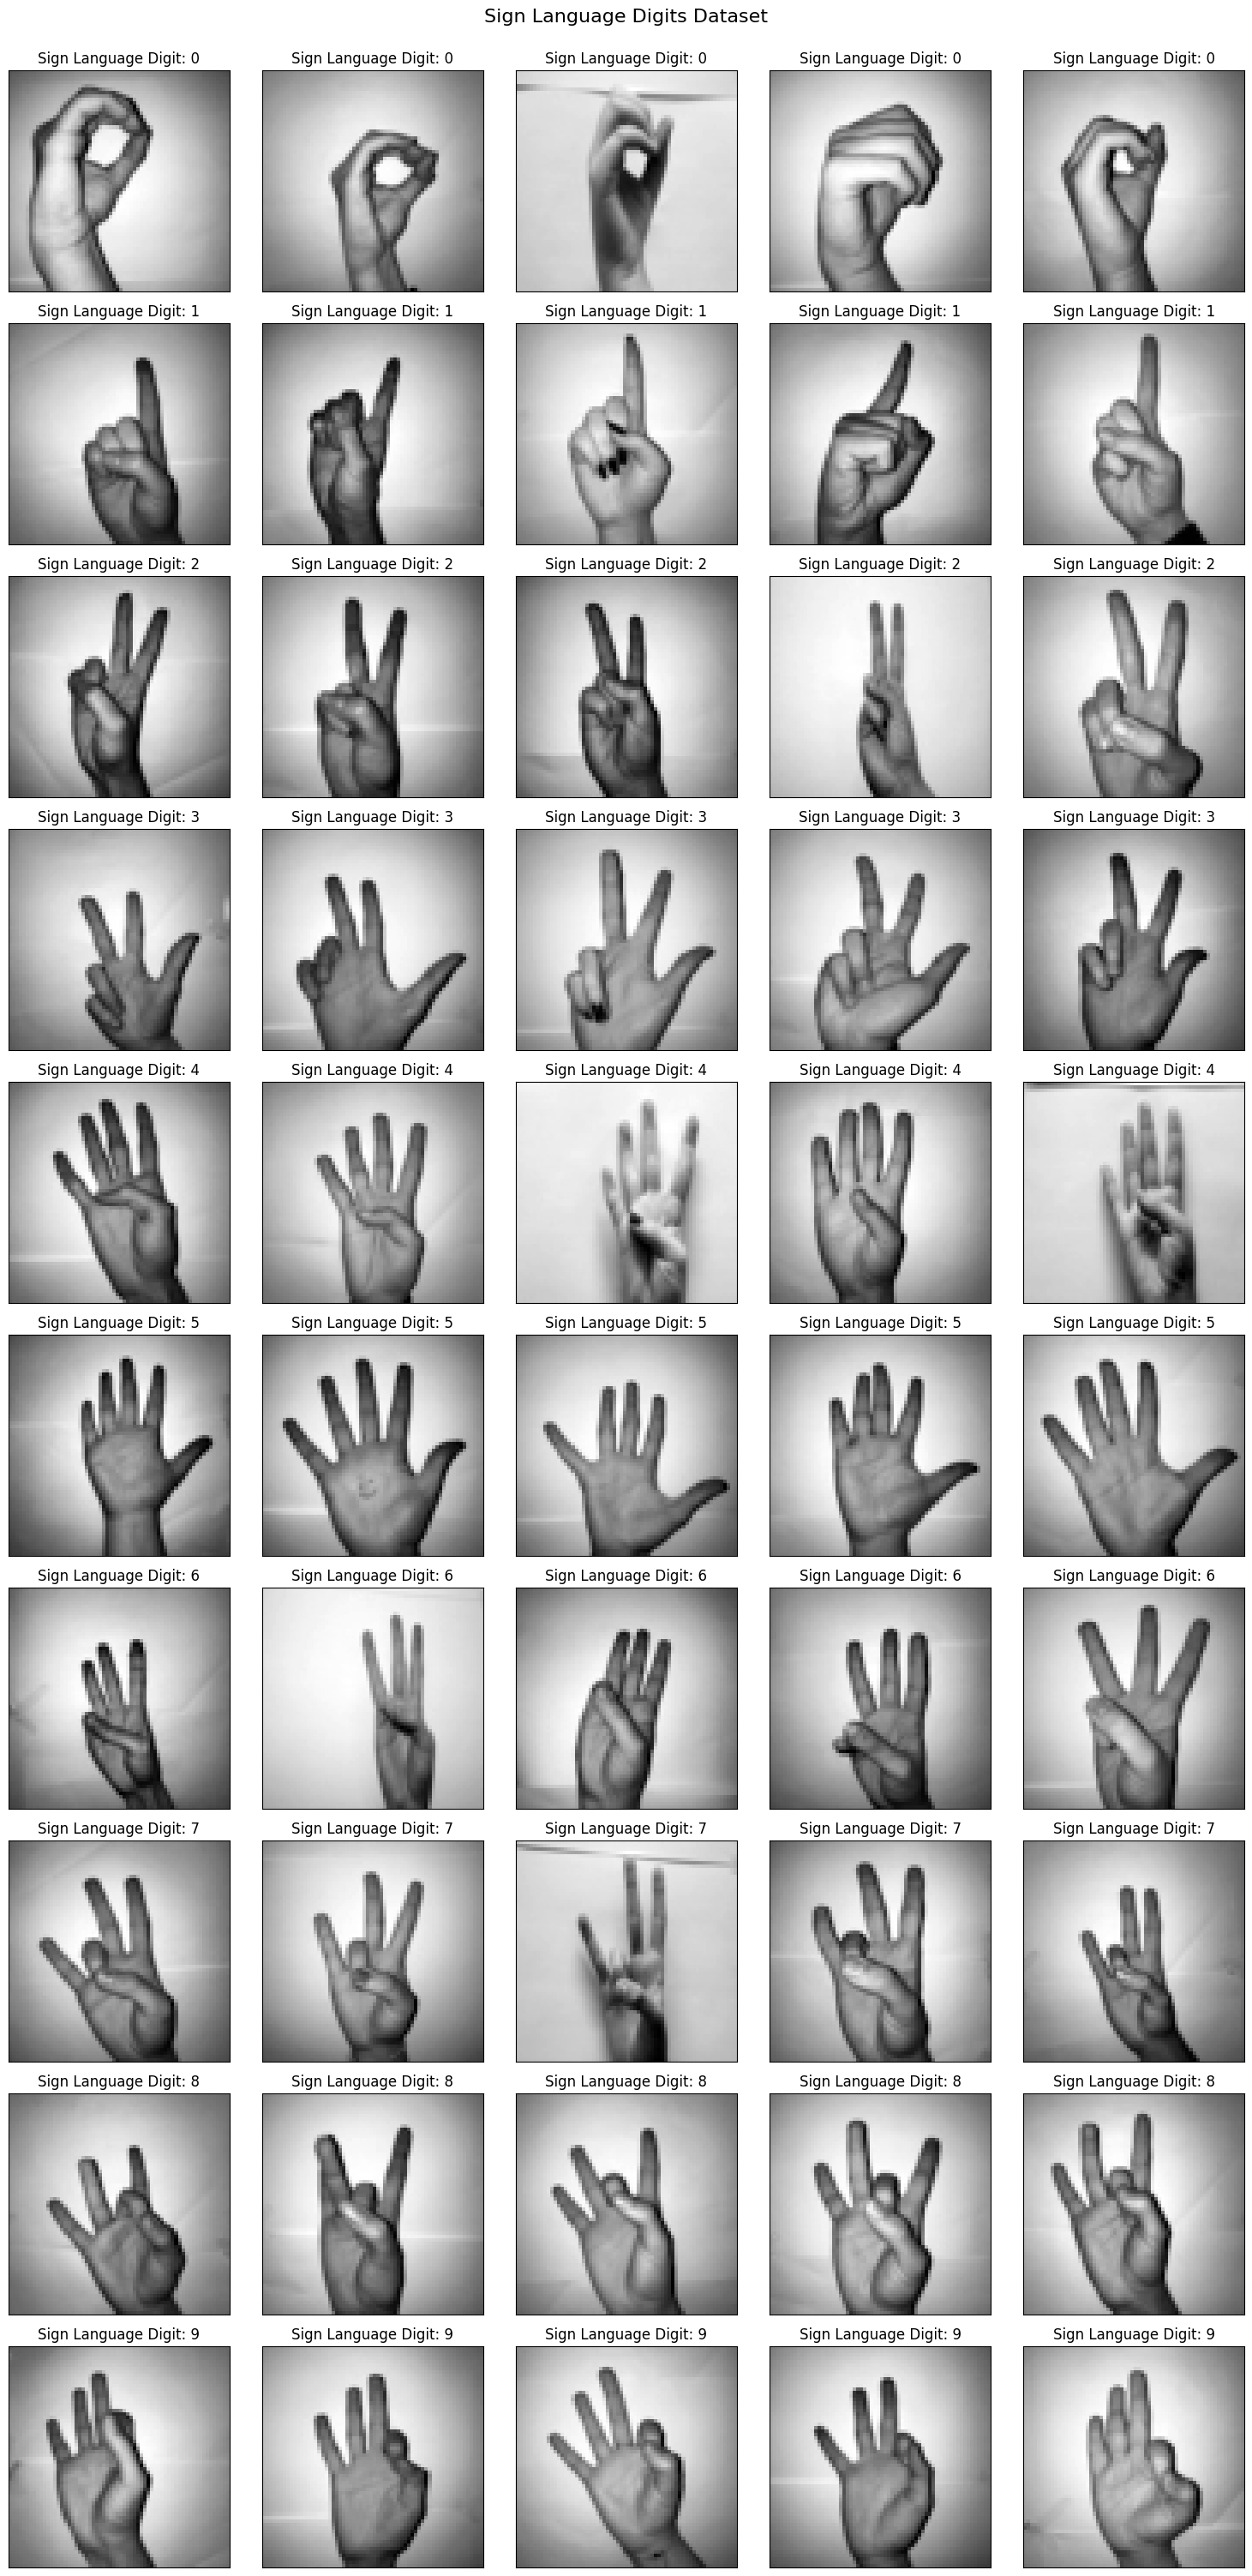

In [9]:
show_image_classes(X, y, label_map, n=5)


In [2]:
import torch
print("CUDA是否可用:", torch.cuda.is_available())
print("GPU数量:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("当前GPU:", torch.cuda.get_device_name(0))

import torch
print("PyTorch版本:", torch.__version__)
print("CUDA是否可用:", torch.cuda.is_available())

CUDA是否可用: True
GPU数量: 1
当前GPU: NVIDIA GeForce RTX 3060 Laptop GPU
PyTorch版本: 2.4.1
CUDA是否可用: True
